<a href="https://colab.research.google.com/github/DarkKillX/MachineLearningTasks/blob/main/Midterm%20Exam/UTS_ML_Zoo_Animals_Extended_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**UTS Machine Learning_Zoo Animals Extended Dataset**

**Nama    : Dery Hidayat**

**Nim     : 1103228181**

**Dataset   : [Zoo Animals Extended Dataset](https://https://www.kaggle.com/datasets/agajorte/zoo-animals-extended-dataset/code)**

**Model     : K-Nearest Neighbors**

Prompt:Berikan kode mounting google colab ke google drive

In [1]:
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns

# Mount Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Prompt: buatkan pd untuk membaca dataset zoo3.csv

In [2]:
import pandas as pd

# Membaca dataset zoo3.csv
df = pd.read_csv('/content/drive/MyDrive/Datasheet/zoo3.csv')

# Menampilkan beberapa baris pertama dari dataset
df.head(5)


,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,anta,1,0,0,1,0,0,0,1,1,1,0,0,4,0,0,0,1
1,ariranha,1,0,0,1,0,1,1,1,1,1,0,1,4,1,0,0,1
2,boto-cor-de-rosa,0,0,0,1,0,1,1,1,1,1,0,1,0,1,0,0,1
3,bugio,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,0,1
4,cachorro-vinagre,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


Prompt:ada beberapa kolom yaitu (animal_name,	hair,	feathers,	eggs,	milk,	airborne,	aquatic,	predator,	toothed,	backbone,	breathes,	venomous,	fins,	legs,	tail,	domestic,	catsize, class_type) sekarang tentukan oleh kamu yang mana target dan fiturnya saya nanti menggunakan model KNN

##EDA
EDA adalah singkatan dari Exploratory Data Analysis, yang merupakan proses awal dalam analisis data. Tujuannya adalah untuk memahami isi dari dataset yang telah diperoleh sebelum menjalankan analisis yang lebih mendalam atau membangun model. EDA melibatkan serangkaian teknik dan pendekatan untuk mengeksplorasi, meringkas, dan menganalisis data untuk mendapatkan wawasan yang bermanfaat.

Prompt:kode untuk melakukan EDA untuk dataset zoo3.csv tersebut sesuai dengan info

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  70 non-null     object
 1   hair         70 non-null     int64 
 2   feathers     70 non-null     int64 
 3   eggs         70 non-null     int64 
 4   milk         70 non-null     int64 
 5   airborne     70 non-null     int64 
 6   aquatic      70 non-null     int64 
 7   predator     70 non-null     int64 
 8   toothed      70 non-null     int64 
 9   backbone     70 non-null     int64 
 10  breathes     70 non-null     int64 
 11  venomous     70 non-null     int64 
 12  fins         70 non-null     int64 
 13  legs         70 non-null     int64 
 14  tail         70 non-null     int64 
 15  domestic     70 non-null     int64 
 16  catsize      70 non-null     int64 
 17  class_type   70 non-null     int64 
dtypes: int64(17), object(1)
memory usage: 10.0+ KB


Dengan informasi dari df.info(), kita bisa melihat bahwa semua kolom, kecuali animal_name, memiliki tipe data integer (int64). Oleh karena itu, kita dapat menggunakan semua kolom tersebut sebagai fitur-fitur untuk model KNN. Sementara itu, kolom class_type akan menjadi target yang ingin kita prediksi.

Prompt:ini adalah kode untuk melihat statistik deskriptif

In [4]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,0.314286,0.285714,0.728571,0.271429,0.314286,0.328571,0.442857,0.485714,0.871429,0.900000,0.142857,0.157143,2.800000,0.700000,0.142857,0.314286,2.900000
std,0.467583,0.455016,0.447907,0.447907,0.467583,0.473085,0.500310,0.503405,0.337142,0.302166,0.352454,0.366563,1.967858,0.461566,0.352454,0.467583,1.850578
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


Penting untuk disebutkan bahwa EDA dapat disesuaikan dengan kebutuhan analisis Anda. Kode di atas memberikan contoh visualisasi distribusi kelas, korelasi antar fitur, distribusi nilai pada setiap fitur, dan pair plot untuk melihat hubungan antar fitur. Anda dapat menyesuaikan kode ini atau menambahkan visualisasi lain sesuai dengan pertanyaan analisis yang sesuai dengan yang kita inginkan

Prompt:saya mendapatkan bahwa df['class_type'].value_counts() dengan outputnya

In [5]:
# Jumlah sampel per kelas
df['class_type'].value_counts()

2    20
1    19
3     8
4     8
5     6
6     5
7     4
Name: class_type, dtype: int64

Dengan informasi ini, Anda dapat lebih memahami seimbang atau tidaknya distribusi kelas dalam dataset. Jika terdapat ketidakseimbangan, hal ini perlu diperhatikan karena dapat mempengaruhi kinerja model klasifikasi. Misalnya, model mungkin memiliki kecenderungan untuk lebih baik dalam memprediksi kelas mayoritas.

Prompt:coba buatkan kode untuk mengecek adanya data kosong atau tidak di dataset saya ini

In [5]:
# Mengecek keberadaan data kosong
missing_data = df.isnull().sum()

# Menampilkan hasil
print("Jumlah data kosong per kolom:")
print(missing_data)

# Menampilkan kesimpulan apakah ada data kosong atau tidak
if missing_data.sum() == 0:
    print("\nTidak ada data kosong dalam dataset.")
else:
    print("\nAda data kosong dalam dataset.")

Jumlah data kosong per kolom:
animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
class_type     0
dtype: int64

Tidak ada data kosong dalam dataset.


Kode ini akan menghitung jumlah nilai kosong per kolom dan jika jumlah total nilai kosong (di semua kolom) adalah 0, maka akan menampilkan pesan bahwa tidak ada data kosong dalam dataset.

Prompt:sekarang saya mau kamu buatkan kode untuk data visualization (lebih dari 1 kode) untuk dataset saya barusan dengan kolom yang sudah saya berikan

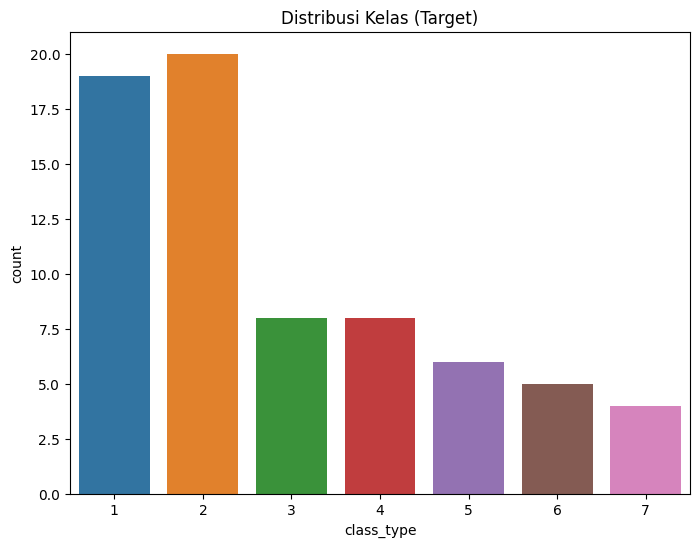

In [6]:
# Menampilkan distribusi kelas (target)
plt.figure(figsize=(8, 6))
sns.countplot(x='class_type', data=df)
plt.title('Distribusi Kelas (Target)')
plt.show()

<ipython-input-7-e7768f35b242>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')


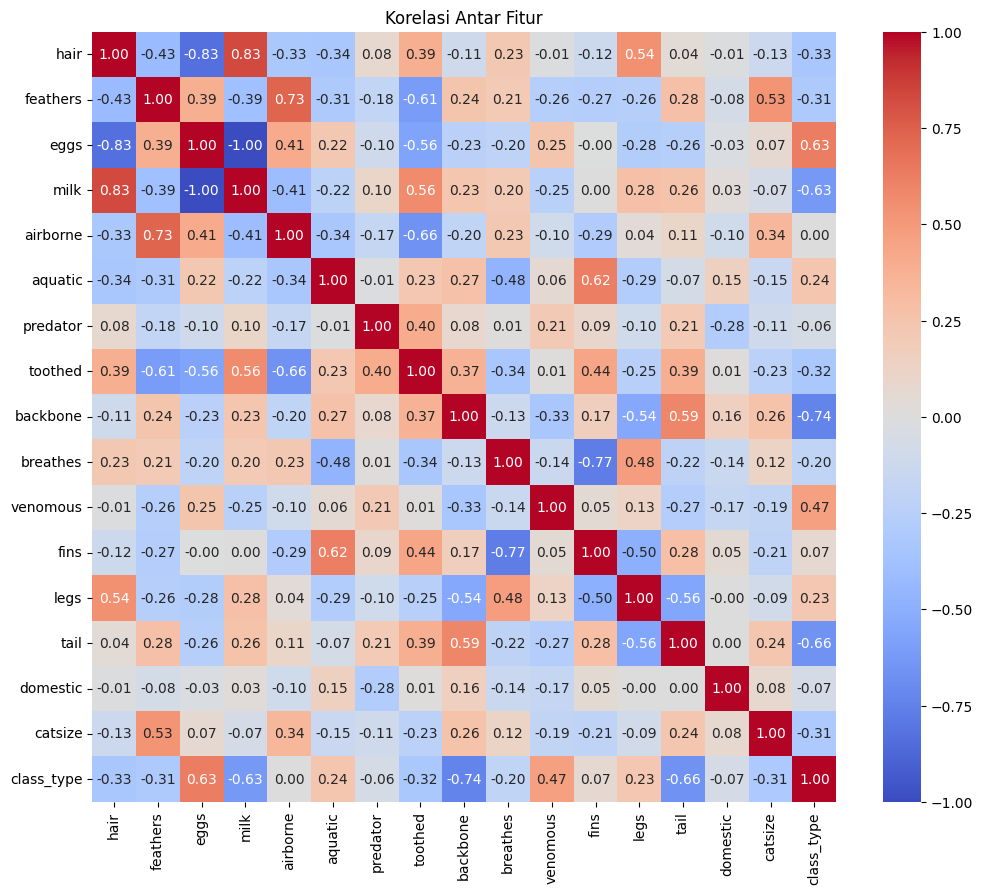

In [7]:
# Menampilkan korelasi antar fitur
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi Antar Fitur')
plt.show()

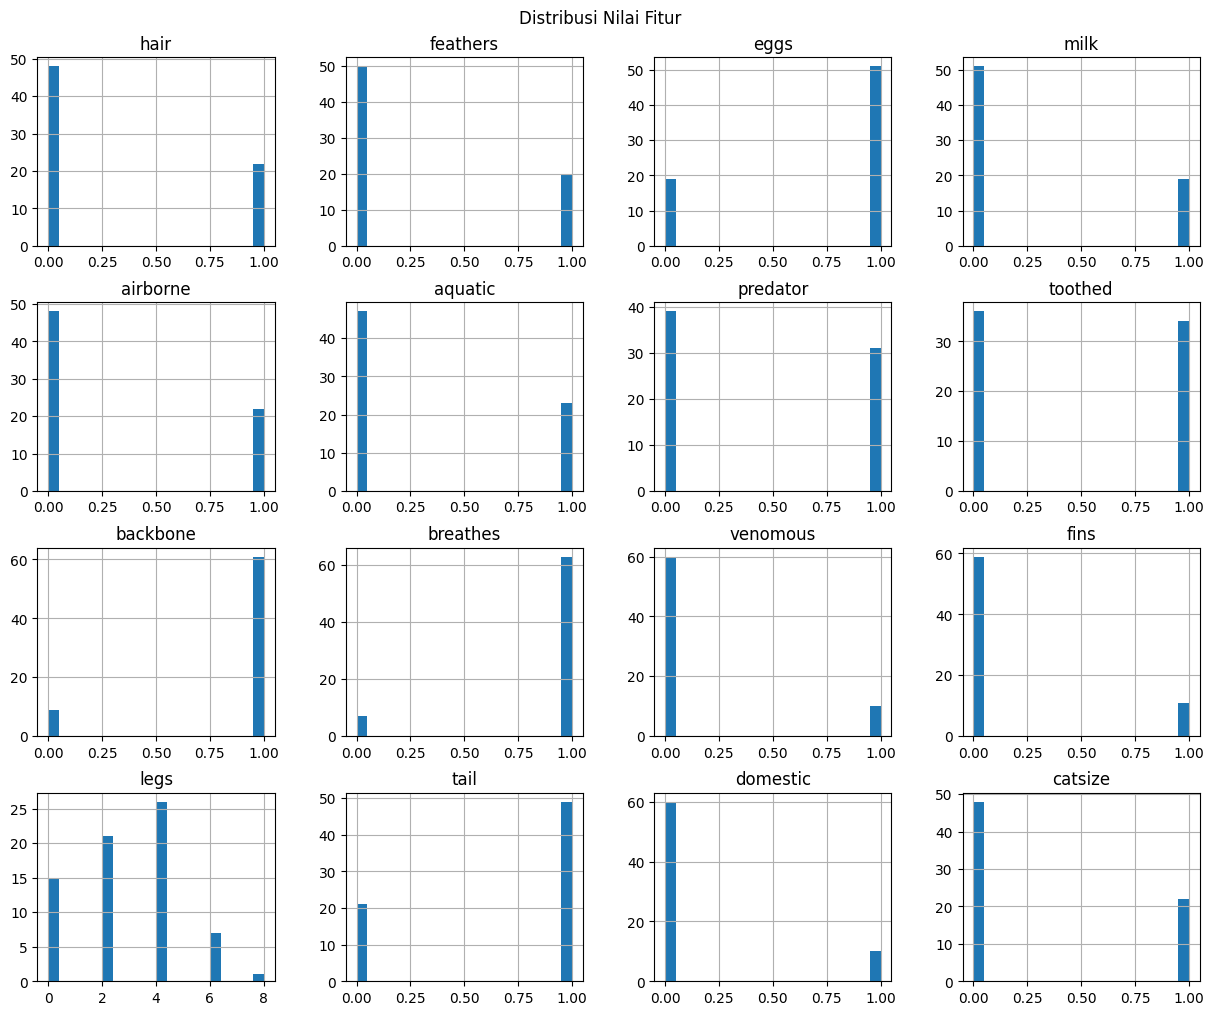

In [8]:
# Menampilkan distribusi nilai pada setiap fitur
df.drop(['class_type'], axis=1).hist(figsize=(15, 12), bins=20)
plt.suptitle('Distribusi Nilai Fitur', y=0.92)
plt.show()

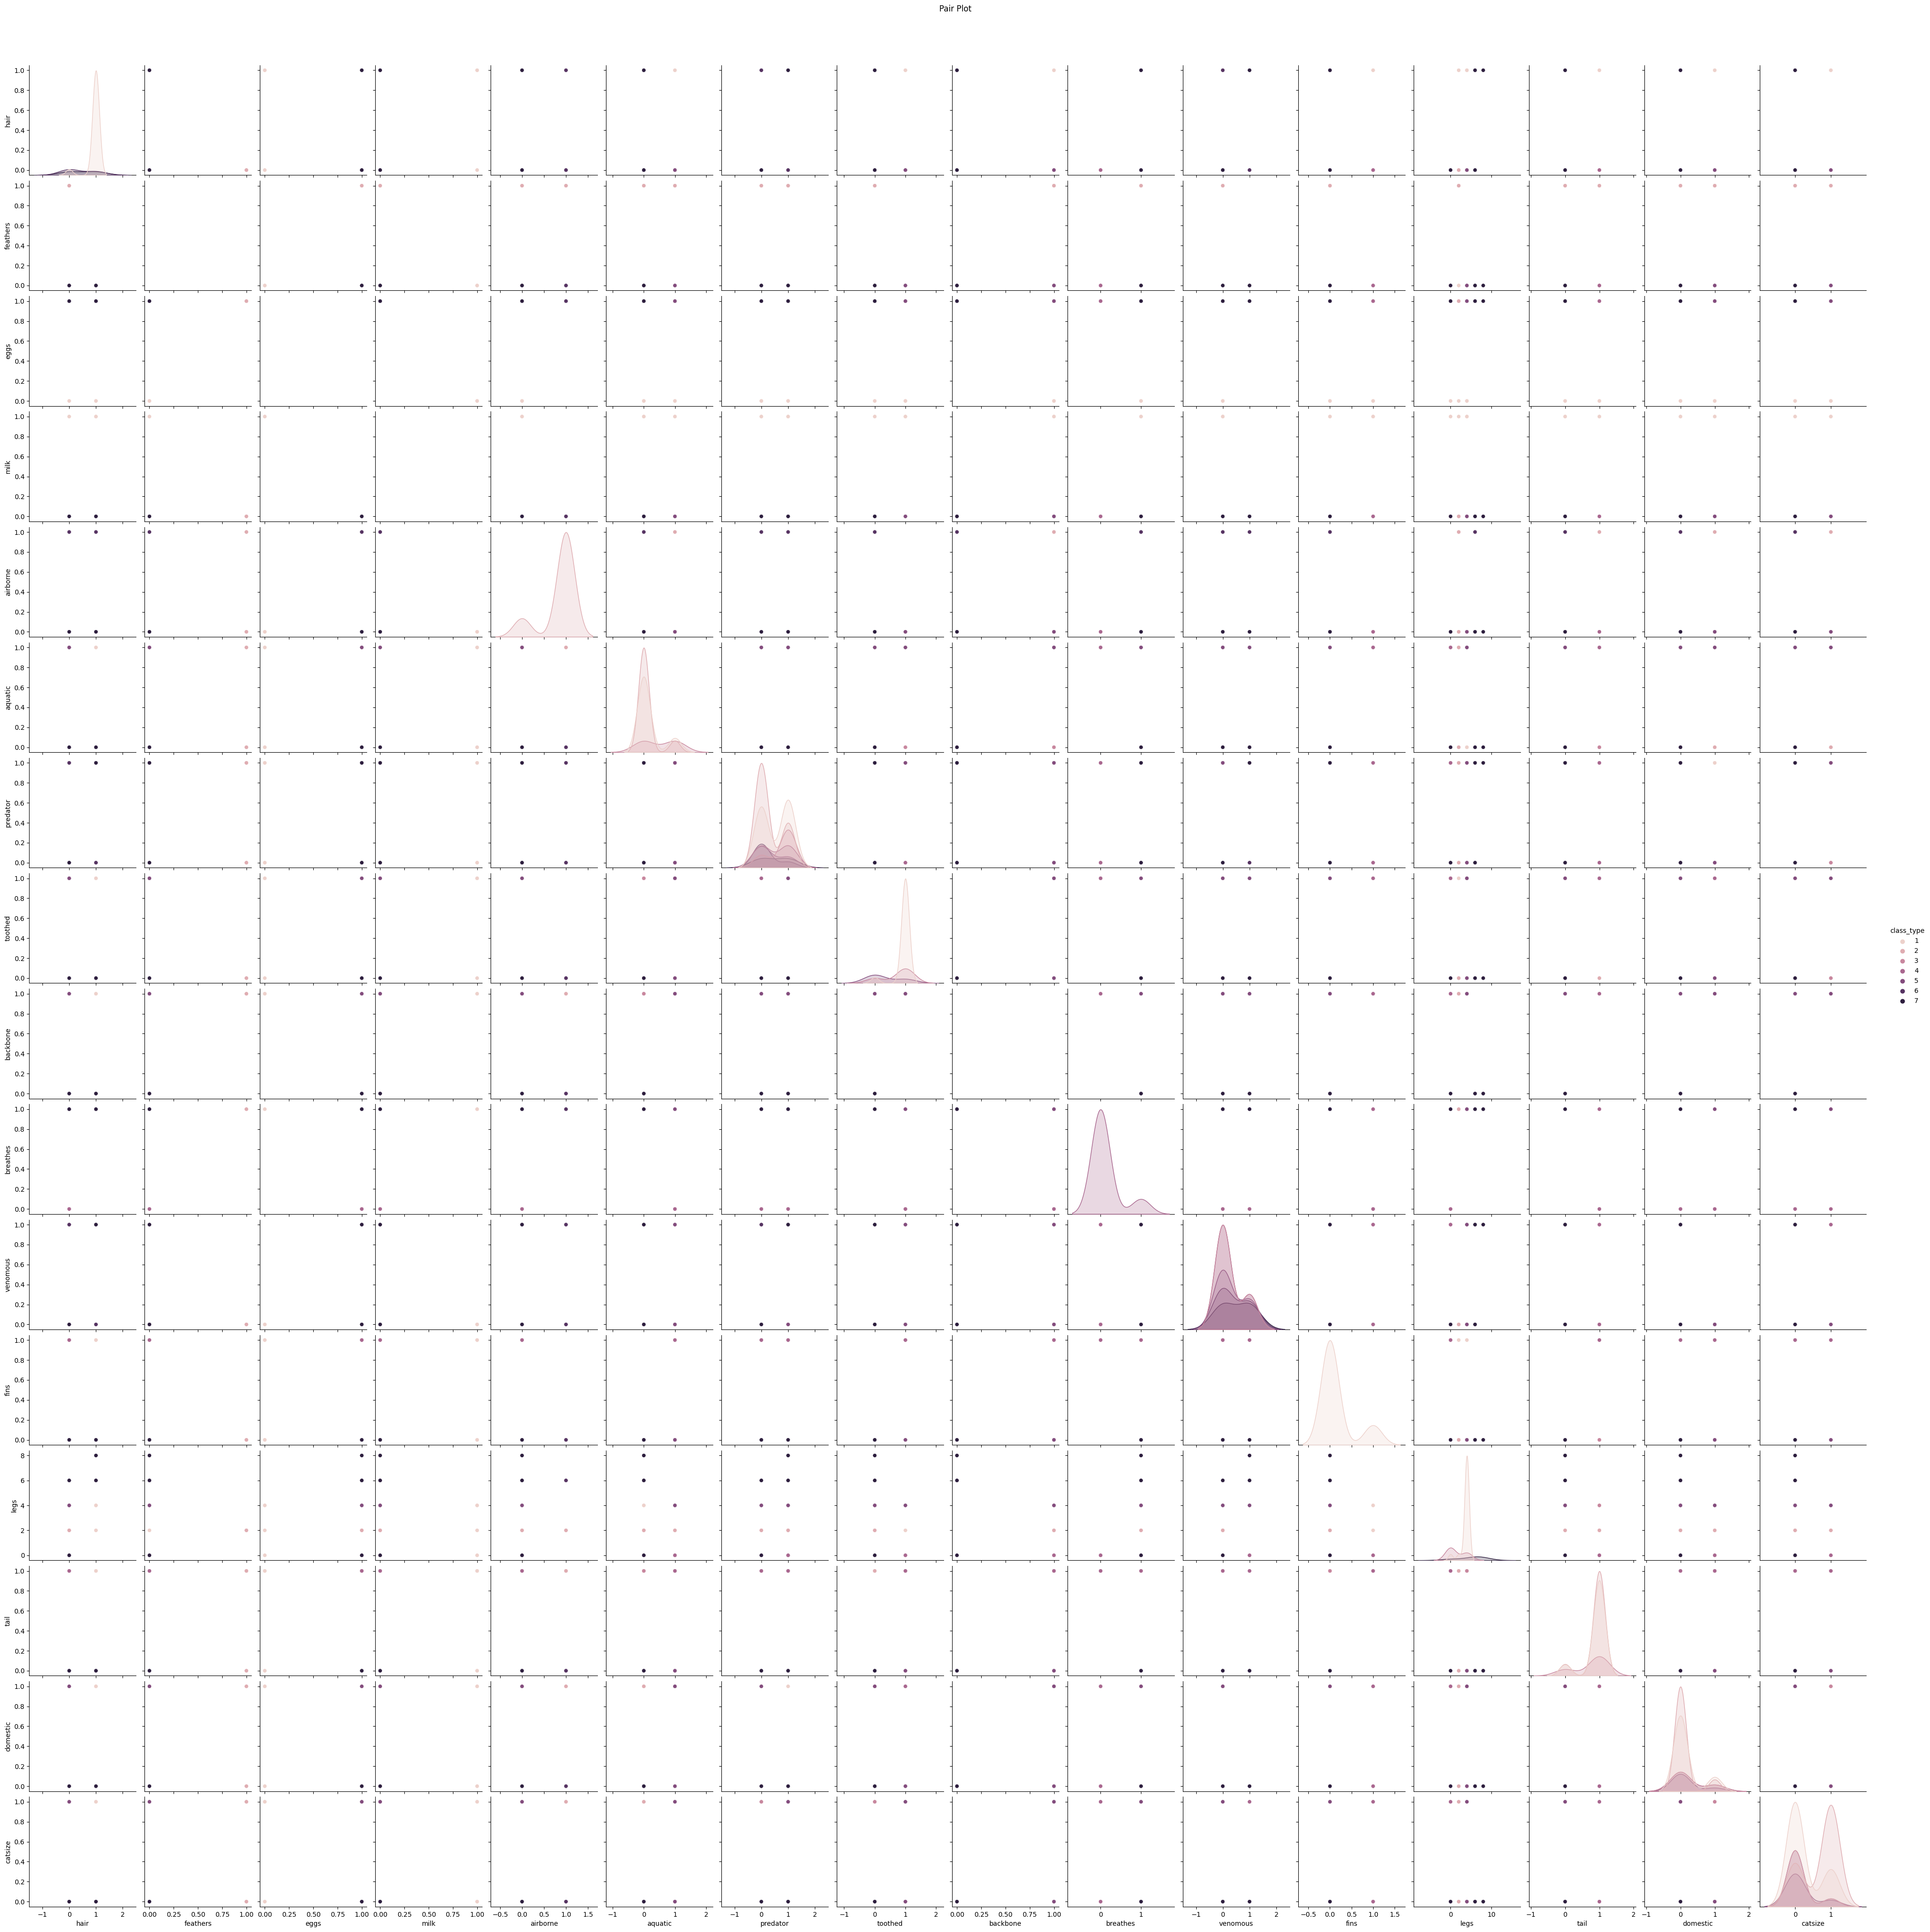

In [9]:
# Menampilkan pair plot untuk melihat hubungan antar fitur
sns.pairplot(df.drop(['animal_name'], axis=1), hue='class_type')
plt.suptitle('Pair Plot', y=1.02)
plt.show()

Prompt:buatkan datviz nya lebih banyak

##DatViz
Datviz adalah singkatan dari Data Visualization, yang merujuk pada representasi grafis dari informasi dan data. Ini melibatkan penggunaan grafik, plot, dan elemen visual lainnya untuk memvisualisasikan data agar lebih mudah dipahami, menganalisis pola, dan mengidentifikasi wawasan yang mungkin tersembunyi dalam data.

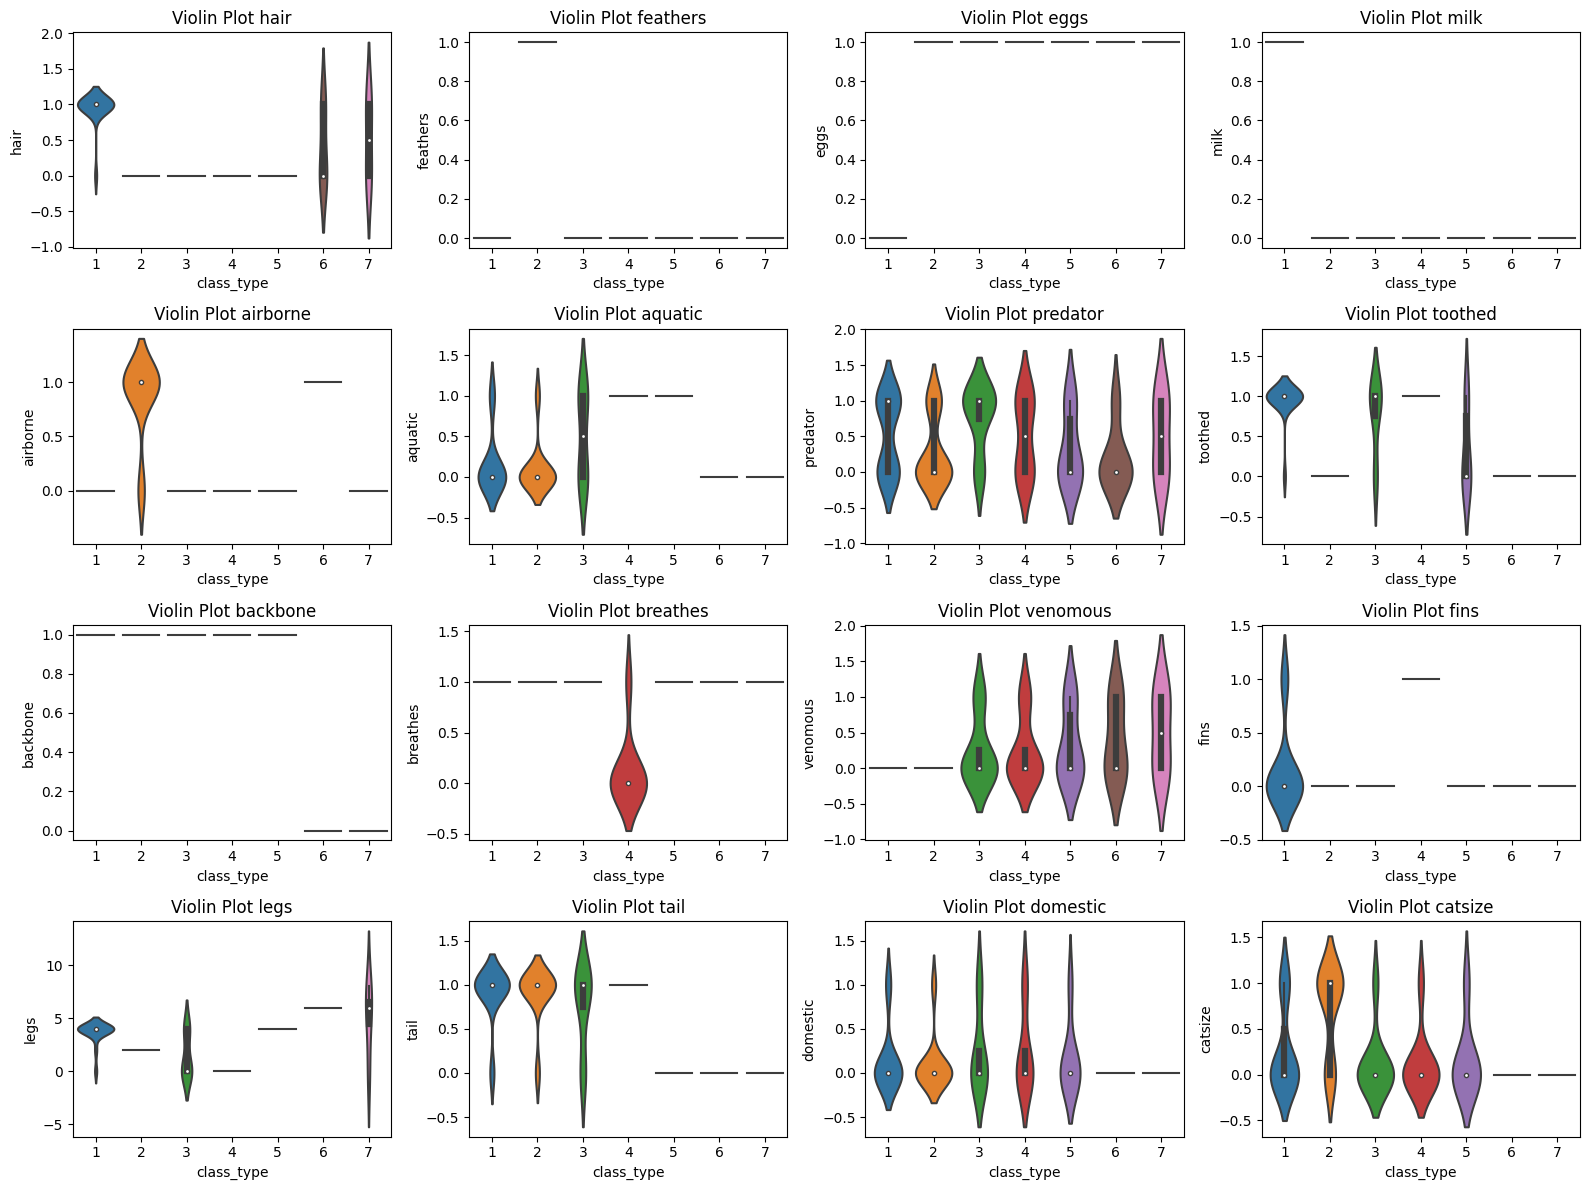

In [10]:
# Menampilkan violin plot untuk masing-masing fitur numerik
num_features = df.drop(['animal_name', 'class_type'], axis=1).columns
plt.figure(figsize=(16, 12))
for i, feature in enumerate(num_features, 1):
    plt.subplot(4, 4, i)
    sns.violinplot(x='class_type', y=feature, data=df)
    plt.title(f'Violin Plot {feature}')
plt.tight_layout()
plt.show()

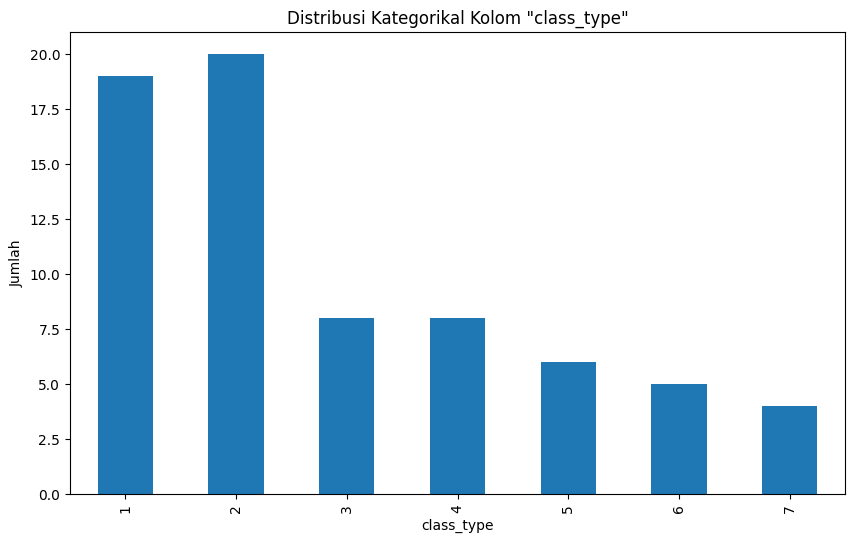

In [11]:
# Menampilkan distribusi kategorikal pada kolom 'class_type'
plt.figure(figsize=(10, 6))
df['class_type'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribusi Kategorikal Kolom "class_type"')
plt.xlabel('class_type')
plt.ylabel('Jumlah')
plt.show()

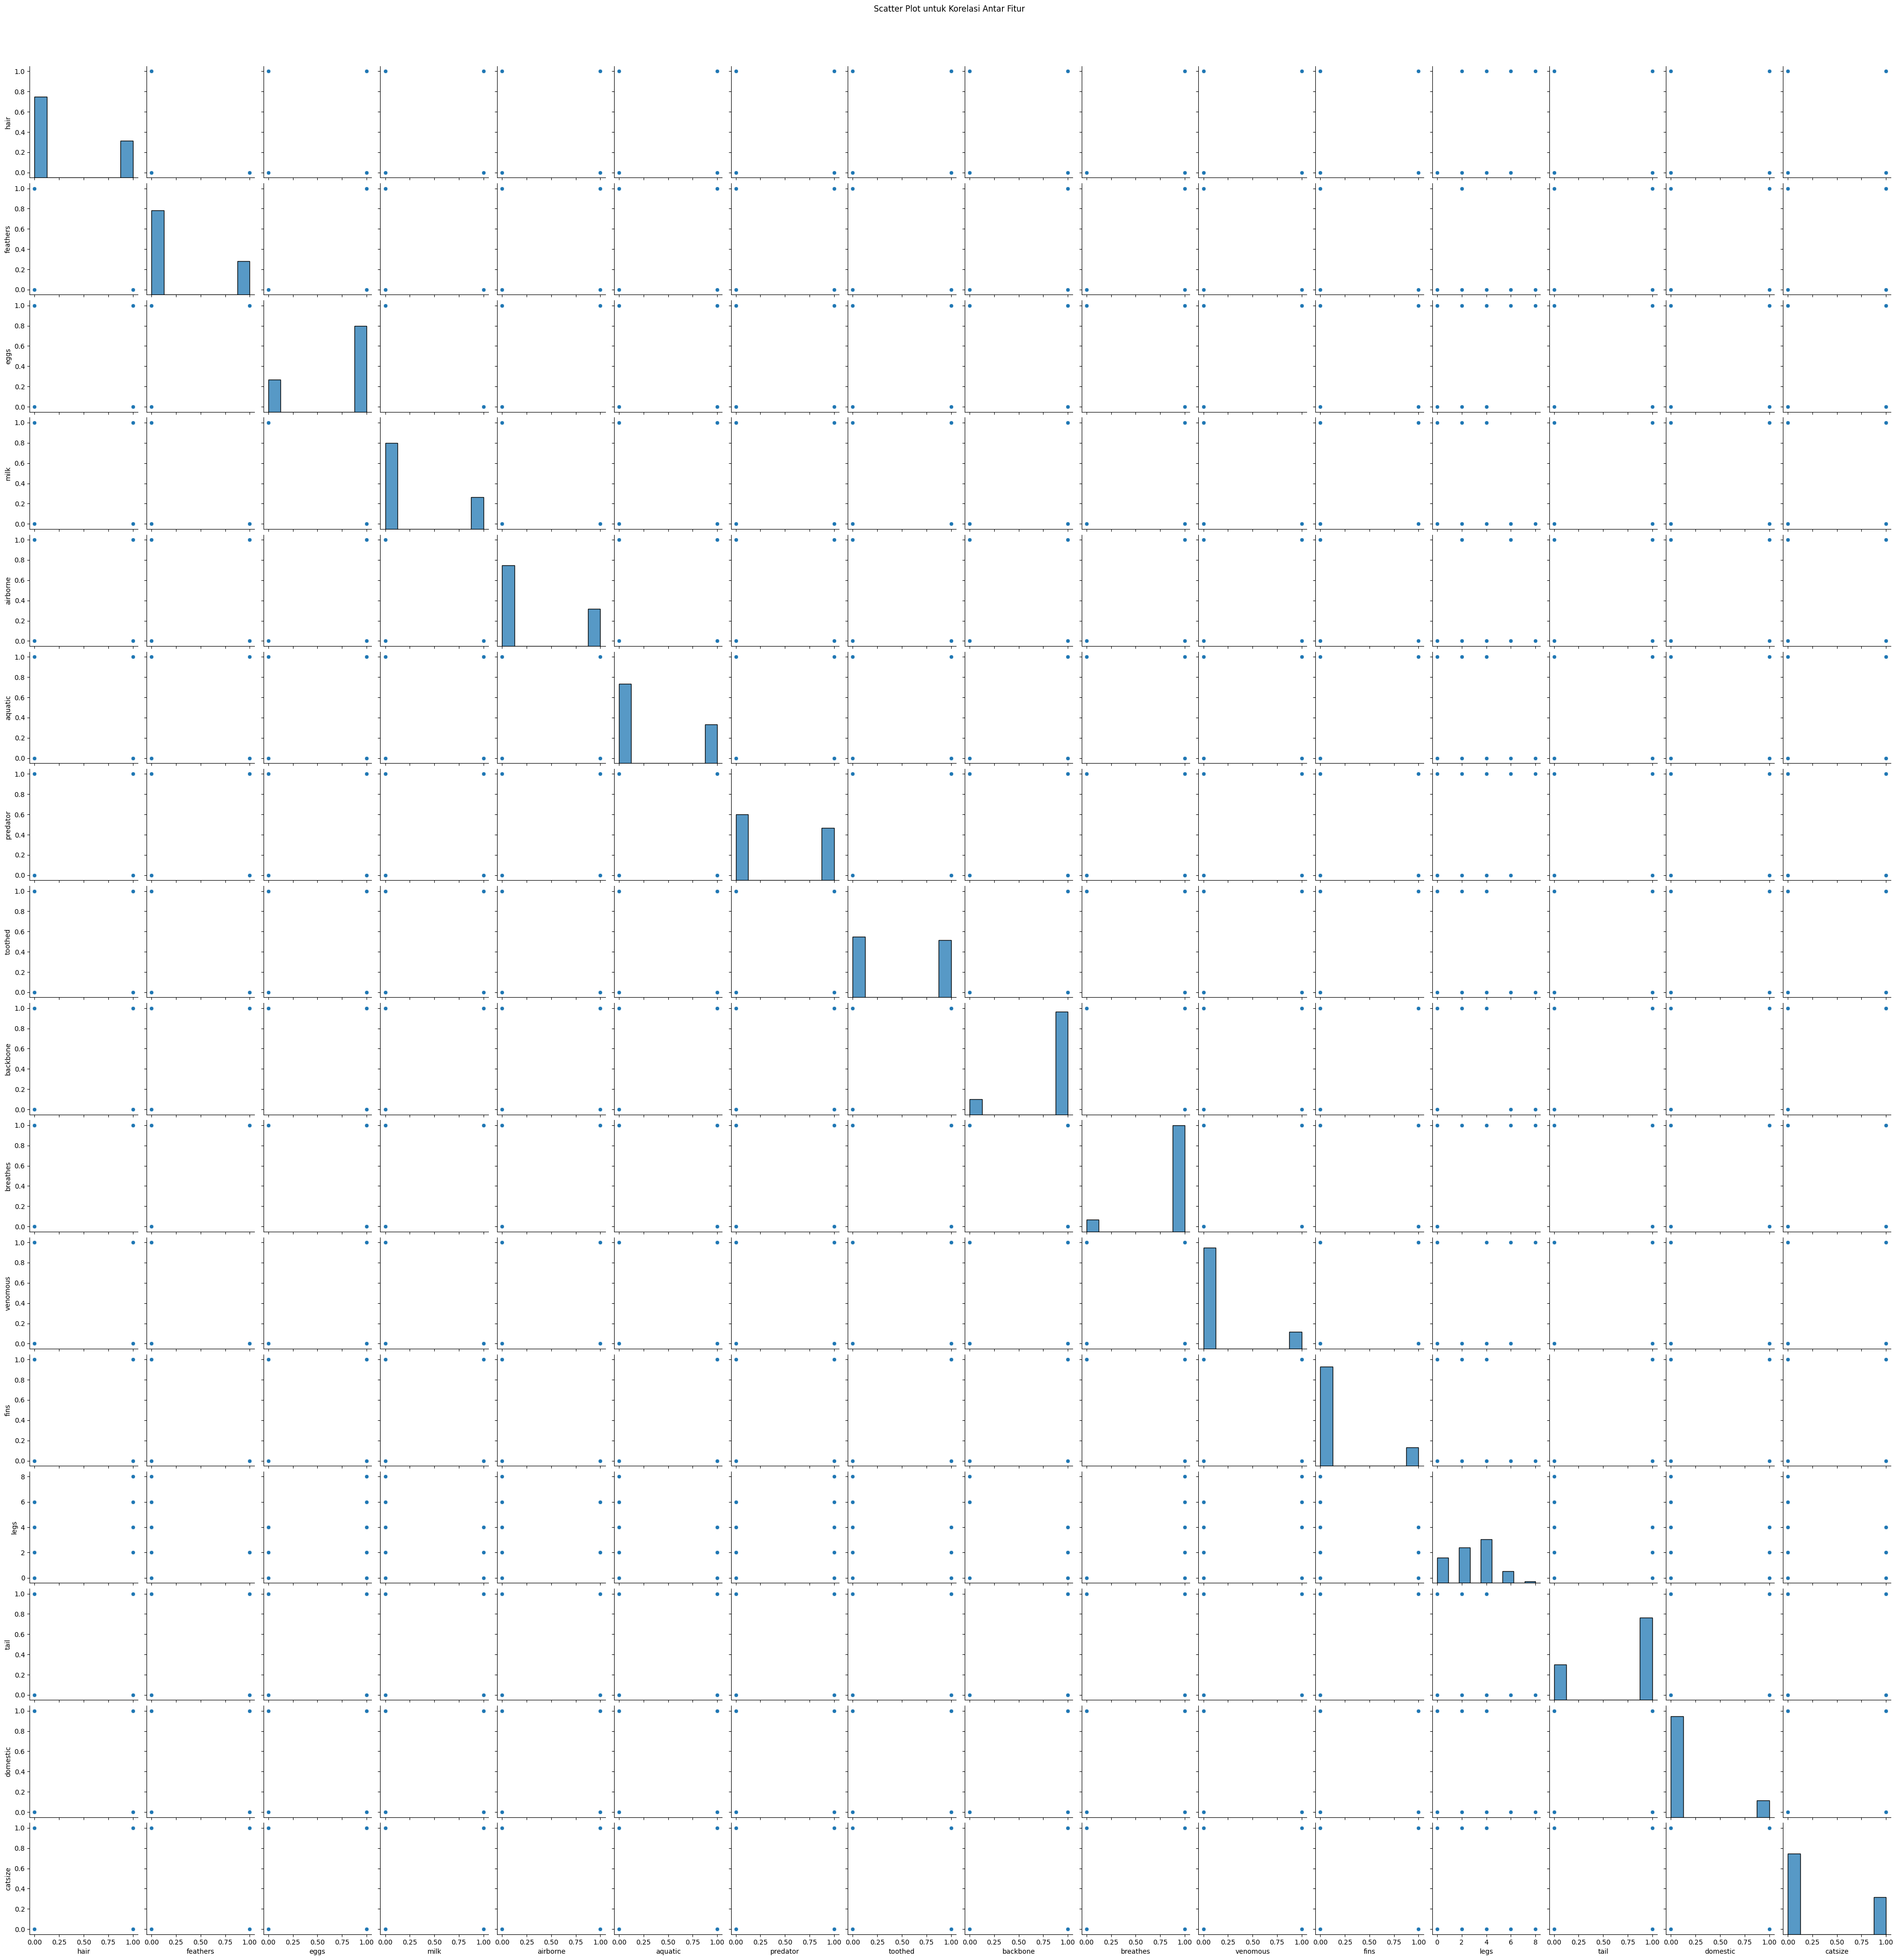

In [12]:
# Scatter plot untuk melihat korelasi antar fitur
sns.pairplot(df.drop(['animal_name', 'class_type'], axis=1), kind='scatter')
plt.suptitle('Scatter Plot untuk Korelasi Antar Fitur', y=1.02)
plt.show()

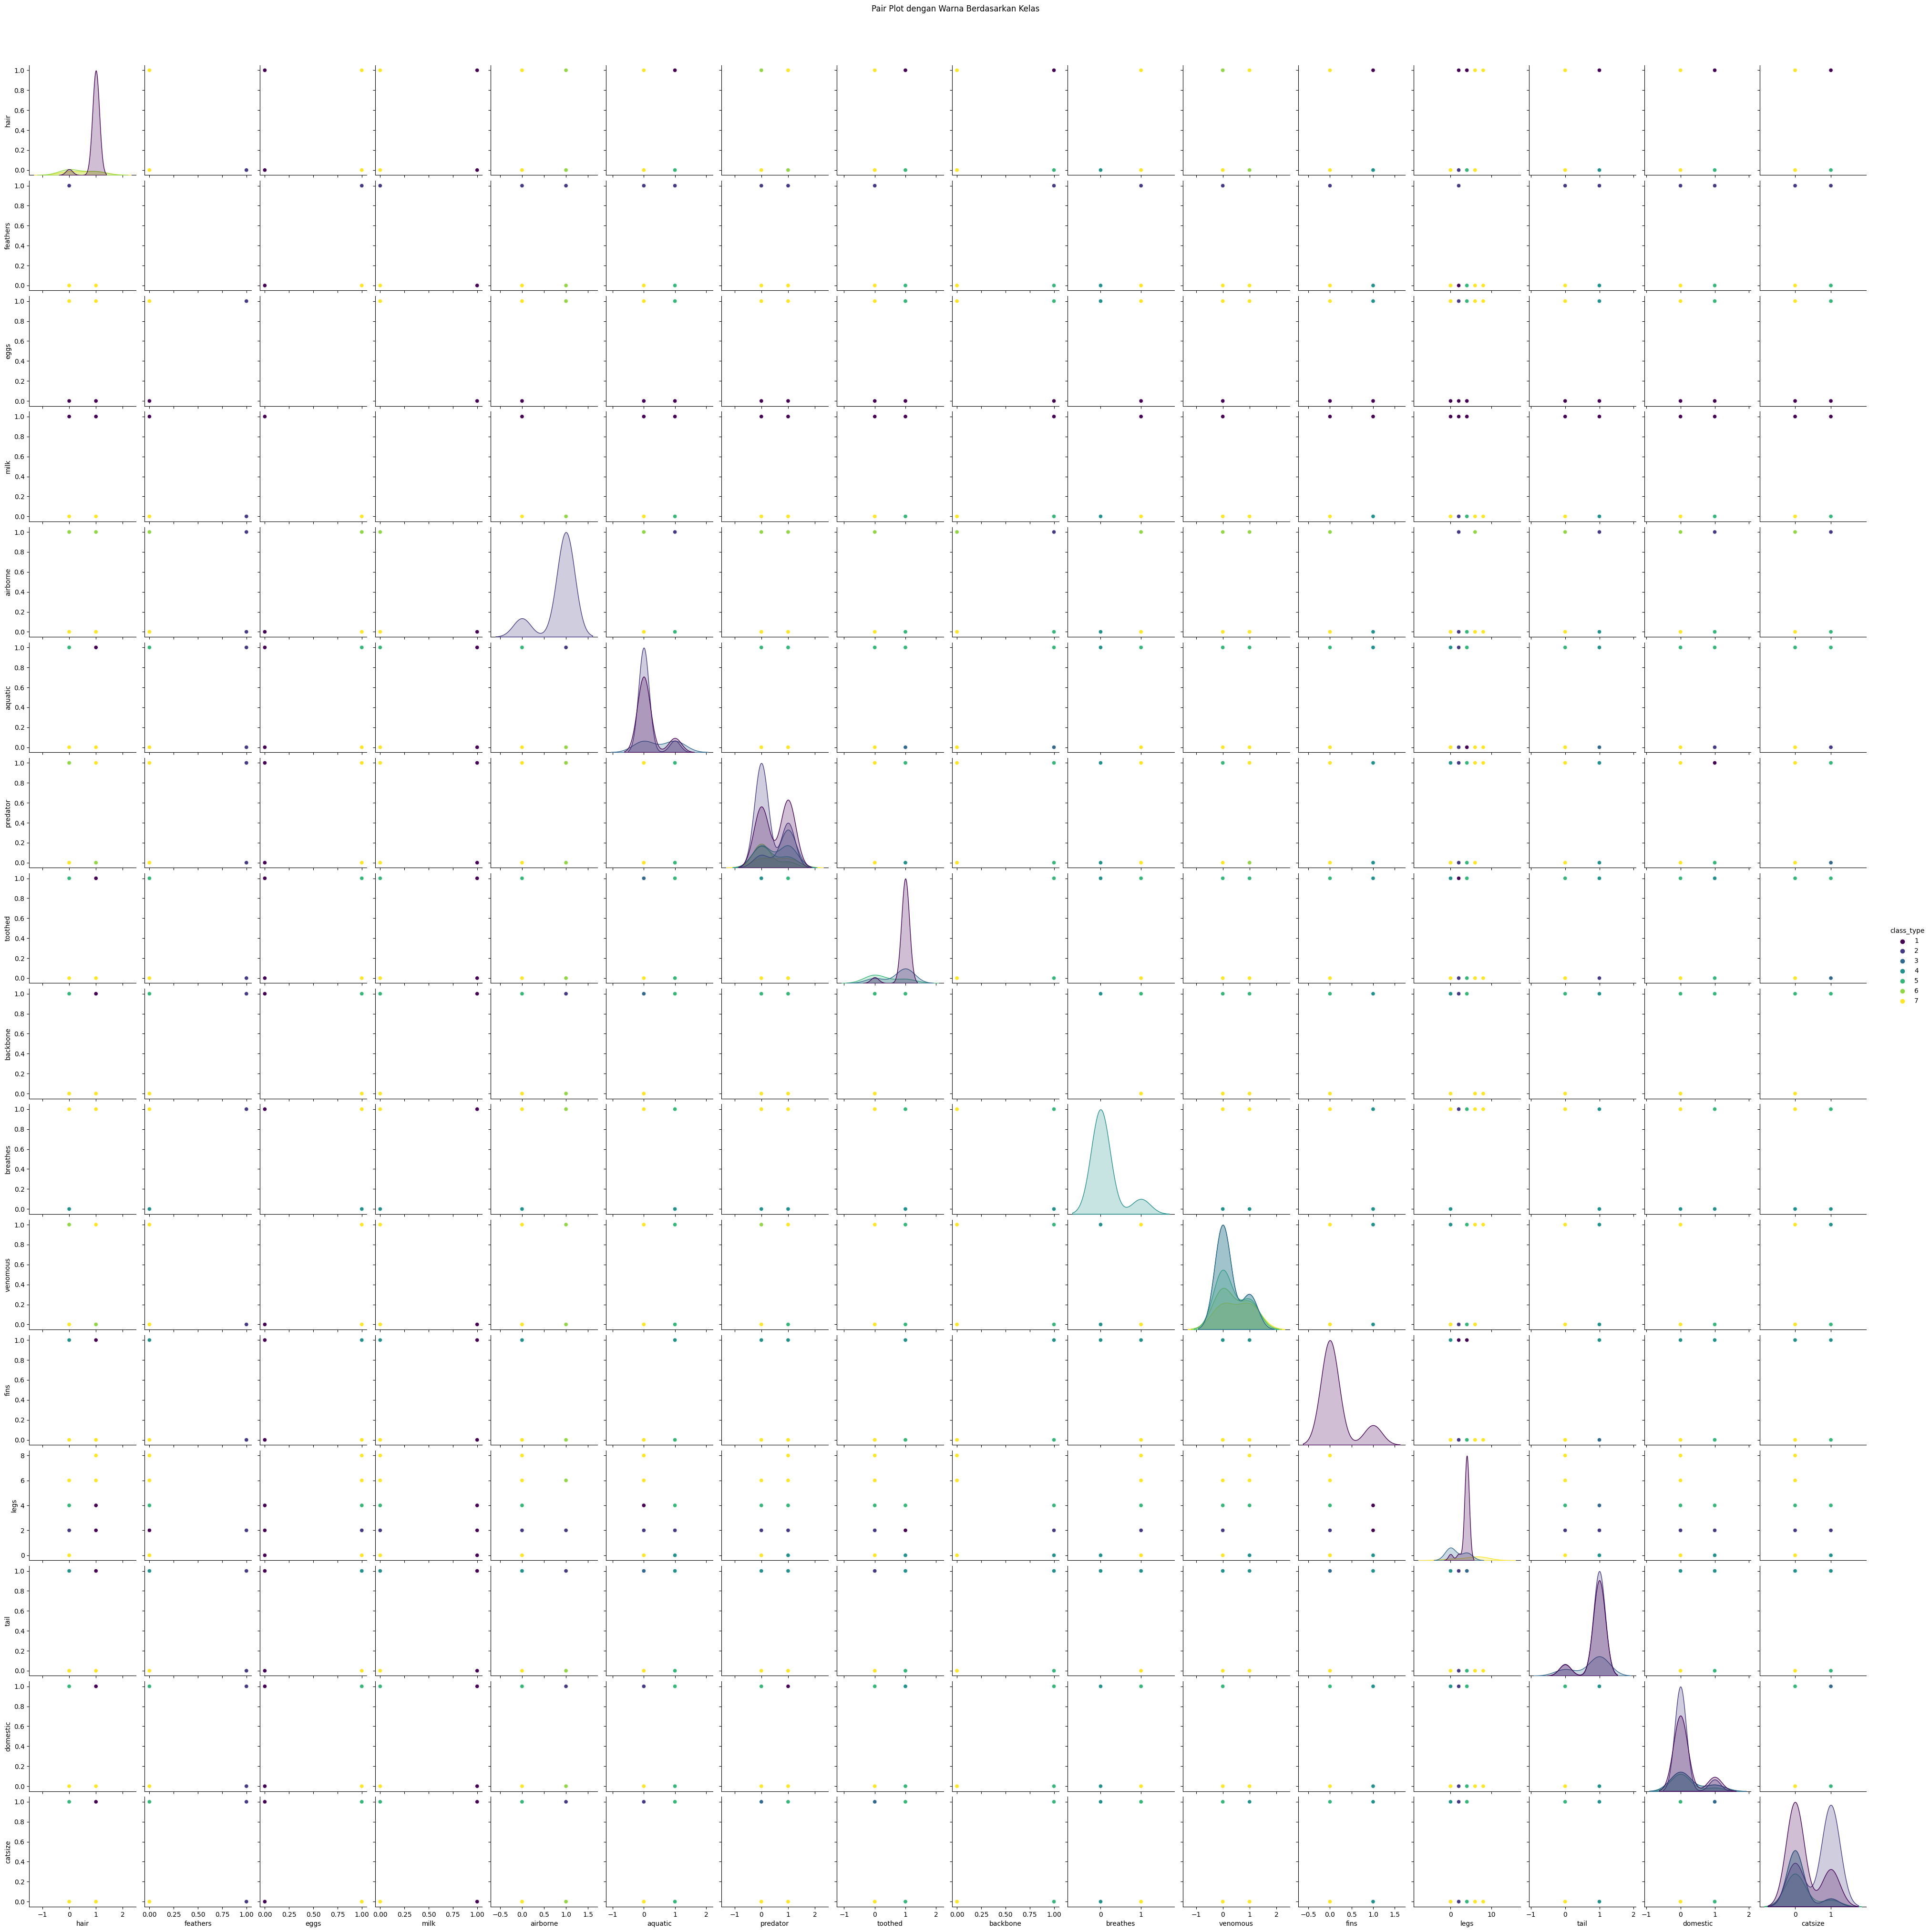

In [13]:
# Pair plot dengan warna berdasarkan kelas
sns.pairplot(df.drop(['animal_name'], axis=1), hue='class_type', palette='viridis')
plt.suptitle('Pair Plot dengan Warna Berdasarkan Kelas', y=1.02)
plt.show()

Prompt:sekarang buatkan kode  antara fitur dan target untuk dilakukan train test split

##Training KNN Model
K-K-Nearest Neighbors (K-NN) adalah sebuah algoritma machine learning yang digunakan untuk masalah klasifikasi dan regresi. "K" dalam K-NN merujuk pada jumlah tetangga terdekat yang dipertimbangkan saat membuat prediksi terhadap titik data yang tidak berlabel.

Proses pelatihan (training) model K-NN sebenarnya tidak memerlukan langkah pelatihan seperti yang dilakukan pada model-model yang lebih kompleks seperti neural networks. Model K-NN disebut sebagai algoritma "lazy learner" karena tidak "mempelajari" relasi atau representasi data seperti halnya neural networks, SVMs, atau decision trees.

In [14]:
from sklearn.model_selection import train_test_split

# Memisahkan fitur dan target
X = df.drop(['animal_name', 'class_type'], axis=1)  # Fitur
y = df['class_type']  # Target

# Melakukan train-test split dengan proporsi 80% data train dan 20% data test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan ukuran setiap set (train dan test)
print("Jumlah data train:", len(X_train))
print("Jumlah data test:", len(X_test))

Jumlah data train: 56
Jumlah data test: 14


In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Membuat model KNN
knn_model = KNeighborsClassifier(n_neighbors=3)  # Anda dapat mengubah nilai n_neighbors sesuai kebutuhan

# Melatih model KNN pada data training
knn_model.fit(X_train, y_train)

# Melakukan prediksi pada data uji
y_pred = knn_model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Menampilkan hasil evaluasi
print(f'Akurasi: {accuracy:.2f}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(class_report)


Akurasi: 0.86

Confusion Matrix:
[[7 0 0 0 0 0]
 [0 3 0 0 0 0]
 [0 0 0 0 1 0]
 [0 0 0 2 0 0]
 [0 0 0 0 0 0]
 [0 0 1 0 0 0]]

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         3
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         2
           5       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         1

    accuracy                           0.86        14
   macro avg       0.50      0.50      0.50        14
weighted avg       0.86      0.86      0.86        14



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

Dalam contoh ini, X_train dan y_train akan berisi data training, sedangkan X_test dan y_test akan berisi data testing. Proporsi 80-20 digunakan di sini, tetapi Anda dapat mengubah nilai test_size sesuai dengan kebutuhan Anda.

Prompt:sekarang masukkan data random sesuai dengan fitur yang ada untuk saya lakukan model ini sudah bagus atau belum

##Input Data Baru
Input data baru dalam konteks machine learning merujuk pada data yang belum pernah dilihat oleh model sebelumnya dan ingin diprediksi atau dianalisis oleh model yang telah dilatih menggunakan data sebelumnya.

Ketika model machine learning sudah dilatih (trained) menggunakan dataset yang tersedia, input data baru ini akan diberikan kepada model untuk melakukan prediksi atau analisis berdasarkan apa yang telah dipelajari oleh model dari data latihan.

Misalnya, jika Anda telah melatih model untuk klasifikasi gambar menggunakan dataset anjing dan kucing, input data baru bisa berupa gambar anjing atau kucing yang belum pernah dilihat oleh model sebelumnya. Model akan menerima gambar ini sebagai input dan melakukan prediksi untuk menentukan apakah gambar tersebut menunjukkan anjing atau kucing berdasarkan apa yang telah dipelajari dari data latihan.

In [16]:
import pandas as pd

# Data baru
databaru = pd.DataFrame({
    'hair': [0],           # Ganti nilai-nilai ini sesuai dengan fitur-fitur yang ada di dataset zoo3.csv
    'feathers': [1],
    'eggs': [1],
    'milk': [0],
    'airborne': [0],
    'aquatic': [1],
    'predator': [1],
    'toothed': [1],
    'backbone': [1],
    'breathes': [1],
    'venomous': [0],
    'fins': [1],
    'legs': [4],
    'tail': [1],
    'domestic': [0],
    'catsize': [1]
})

# Prediksi label menggunakan model KNN
predicted_label = knn_model.predict(databaru)

# Tampilkan hasil prediksi
print(f'Predicted Label: {predicted_label[0]}')

# Tampilkan nama hewan
predicted_animal_name = df.loc[df['class_type'] == predicted_label[0], 'animal_name'].values[0]
print(f'Predicted Animal: {predicted_animal_name}')


Predicted Label: 5
Predicted Animal: perereca-de-alcatrazes


Untuk mendemonstrasikan bagaimana memprediksi label dan menampilkan nama hewan menggunakan model KNN